# LEAD SCORING CASE STUDY

## Importing The Libraries

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)

import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import RFE

from statsmodels.api import add_constant
from statsmodels.api import GLM
from statsmodels.api import families
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_curve       
from sklearn.metrics import roc_auc_score

from sklearn.metrics import confusion_matrix

In [4]:
import warnings
warnings.filterwarnings("ignore")

## The Dataset

### Reading The Dataset

In [5]:
leads = pd.read_csv("Leads.csv")

### Getting A Look At The Dataset

In [6]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


We can see above that there are quite a few 'Select' values which are essentially missing values. So we will treat them as null values.

### Getting General Information About The Dataset

In [7]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Descriptive Statistics Of The Dataset

In [8]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Dealing With The 'Select' Values

In [9]:
leads.replace(to_replace="Select", value=np.nan, inplace=True)

### Checking The Missing Values In The Dataset

In [10]:
# Getting The Percentage Of Missing Values In Each Column

missing_pct = leads.isnull().sum()/leads.shape[0] * 100
missing_pct.sort_values(ascending=False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Index                      45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

## Data Wrangling

### Dealing With The Missing Values

#### Dropping Columns With More Than 30% Missing Values

In [11]:
drop_cols = missing_pct[missing_pct>30].index.tolist()
leads.drop(drop_cols, axis=1, inplace=True)

#### Further Investigating The Categorical Columns With Missing Values

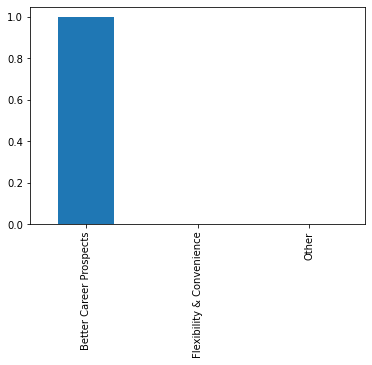

In [12]:
# What matters most to you in choosing a course

leads["What matters most to you in choosing a course"].value_counts(normalize=True).plot.bar()
plt.show()

As we can see the almost all the values in this column are 'Better Career Prospects'. It does not give any additional information about the data. So we can drop this column

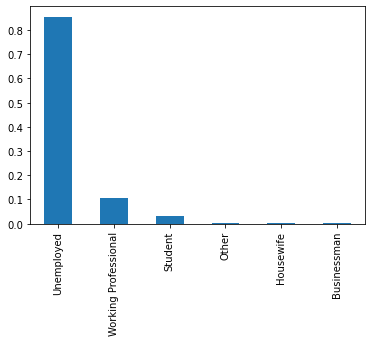

In [13]:
# What is your current occupation

leads["What is your current occupation"].value_counts(normalize=True).plot.bar()
plt.show()

More than 80% values in this column are 'Unemployed'. So basically this column is useless. It is best if we drop it.

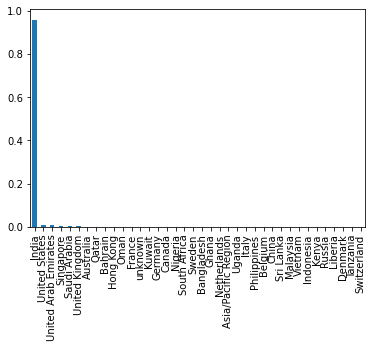

In [14]:
# Country

leads["Country"].value_counts(normalize=True).plot.bar()
plt.show()

As we can see almost all the values in this column belong to a single category 'India'. It can be considered a constant feature. So we can drop it.

In [15]:
drop_cols = ["What matters most to you in choosing a course", "What is your current occupation",
            "Country"]
leads.drop(drop_cols, axis=1, inplace=True)

#### For Columns With Less Missing Values We Will Drop The Rows Containing Missing Values

In [16]:
leads = leads.loc[~(leads["Page Views Per Visit"].isnull())]
leads = leads.loc[~(leads["TotalVisits"].isnull())]
leads = leads.loc[~(leads["Last Activity"].isnull())]
leads = leads.loc[~(leads["Lead Source"].isnull())]

#### Checking For The Missing Values Again

In [17]:
leads.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Courses      0
Update me on Supply Chain Content           0
Get updates on DM Content                   0
I agree to pay the amount through 

We can see that there are no missing values now.

#### Let Us Check For The Shape Of The Cleaned Dataset

In [18]:
leads.shape

(9074, 24)

So we have retained 9074 out of the 9240 rows and 24 out of the 37 columns after data cleaning which is good

## Exploratory Data Analysis

In [19]:
# Check which all columns need to be analyzed

leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9074 non-null   object 
 1   Lead Number                               9074 non-null   int64  
 2   Lead Origin                               9074 non-null   object 
 3   Lead Source                               9074 non-null   object 
 4   Do Not Email                              9074 non-null   object 
 5   Do Not Call                               9074 non-null   object 
 6   Converted                                 9074 non-null   int64  
 7   TotalVisits                               9074 non-null   float64
 8   Total Time Spent on Website               9074 non-null   int64  
 9   Page Views Per Visit                      9074 non-null   float64
 10  Last Activity                       

In [20]:
# Checking Number Of Unique Values In Each Column

num_unique = leads.nunique()
num_unique

Prospect ID                                 9074
Lead Number                                 9074
Lead Origin                                    4
Lead Source                                   21
Do Not Email                                   2
Do Not Call                                    2
Converted                                      2
TotalVisits                                   41
Total Time Spent on Website                 1717
Page Views Per Visit                         114
Last Activity                                 17
Search                                         2
Magazine                                       1
Newspaper Article                              2
X Education Forums                             2
Newspaper                                      2
Digital Advertisement                          2
Through Recommendations                        2
Receive More Updates About Our Courses         1
Update me on Supply Chain Content              1
Get updates on DM Co

### Dropping the constant features

As we can see there are some features which have only one unique value i.e. they are constant. They will not help in our analysis. So let us drop them. 

In [21]:
drop_cols = num_unique[num_unique==1].index.tolist()
leads.drop(drop_cols, axis=1, inplace=True)

### Binary Features

In [22]:
# Storing the binary features in a list

binary_features = num_unique[num_unique==2].index.tolist()

### Categorical Features With High Cardinality

We notice that there are some categorical features which have a very high cardinality. We sill store them in a list and reduce their cardinality. To reduce their cardinality we will get a value count of all the categories, keep some categories and merge the rest into a single category "Others".

#### Lead Source

In [23]:
vc = leads["Lead Source"].value_counts()
vc

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
welearnblog_Home        1
WeLearn                 1
youtubechannel          1
blog                    1
testone                 1
Pay per Click Ads       1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [24]:
other_categories = vc.loc[vc<=1000].index.tolist()

for cat in other_categories:
    leads["Lead Source"].replace(cat, "Others", inplace=True)

#### Last Activity

In [25]:
vc = leads["Last Activity"].value_counts()
vc

Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [26]:
other_categories = vc.loc[vc<=60].index.tolist()

for cat in other_categories:
    leads["Last Activity"].replace(cat, "Others", inplace=True)

#### Last Notable Activity

In [27]:
vc = leads["Last Notable Activity"].value_counts()
vc

Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Resubscribed to emails             1
Form Submitted on Website          1
Approached upfront                 1
View in browser link Clicked       1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [28]:
other_categories = vc.loc[vc<=1000].index.tolist()

for cat in other_categories:
    leads["Last Notable Activity"].replace(cat, "Others", inplace=True)

### Numerical Features

In [29]:
def show_box_plot(x):
    plt.figure(figsize=(10,4))
    sns.boxplot(x=x, data=leads)
    plt.show()

We will visualize the 3 numerical features i.e., 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit' with the boxplot and discretize them.

#### TotalVisits

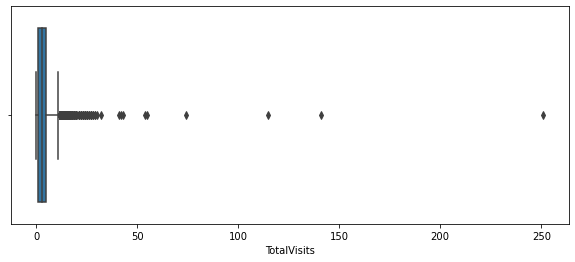

In [30]:
show_box_plot("TotalVisits")

In [31]:
leads["TotalVisits"] = pd.cut(leads["TotalVisits"], bins=[0,2,5,10,300], labels=["0-2", "3-5", "6-10", "10+"], include_lowest=True)

#### Total Time Spent on Website

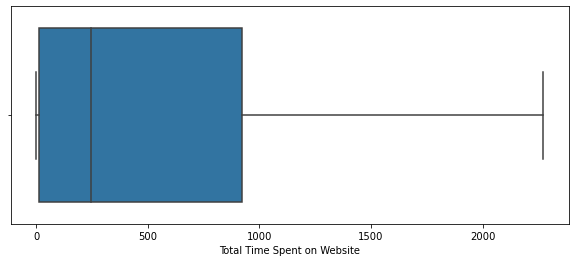

In [32]:
show_box_plot("Total Time Spent on Website")

In [33]:
leads["Total Time Spent on Website"] = pd.cut(leads["Total Time Spent on Website"], bins=[0,50,200,1000,2500], labels=["0-50", "51-200", "201-1000", "1000+"], include_lowest=True)

#### Page Views Per Visit

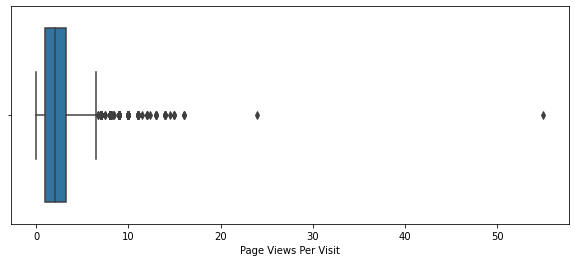

In [34]:
show_box_plot("Page Views Per Visit")

In [35]:
leads["Page Views Per Visit"] = pd.cut(leads["Page Views Per Visit"], bins=[0,1,3,100], labels=["0-1", "2-3", "4+"], include_lowest=True)

### Bivariate Analysis

In [36]:
# Helper Method To Display Bar Plot

def show_bar_plot(x, y="Converted", data=leads, figsize=(8,4)):
    plt.figure(figsize=figsize)
    sns.barplot(data=data, x=x, y=y, ci=None)
    plt.xticks(rotation=45)
    plt.show()

First we will look at the relationship between the categorical variables and the 'Converted' variable

#### Lead Origin

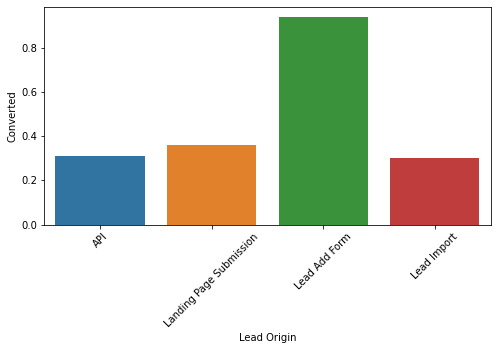

In [37]:
show_bar_plot("Lead Origin")

#### Lead Source

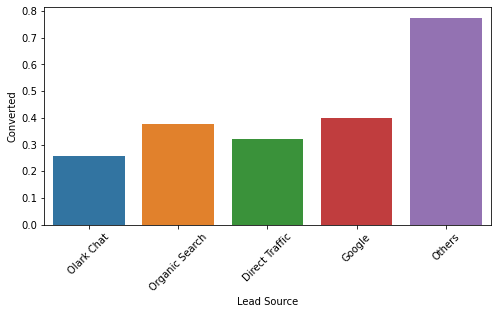

In [38]:
show_bar_plot("Lead Source")

#### Last Activity

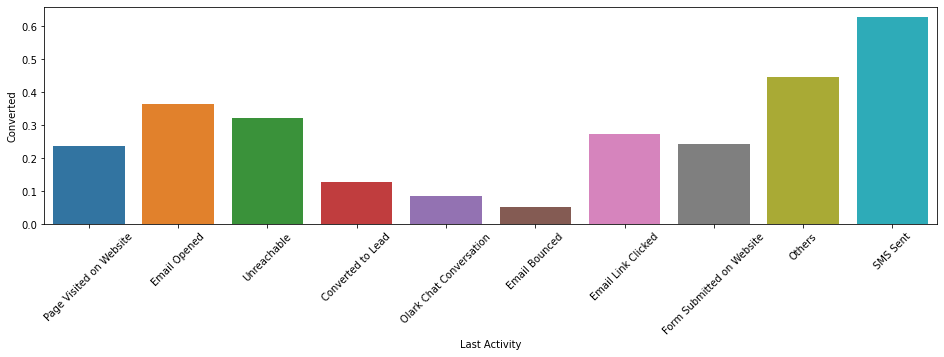

In [39]:
show_bar_plot("Last Activity", figsize=(16,4))

#### Last Notable Activity

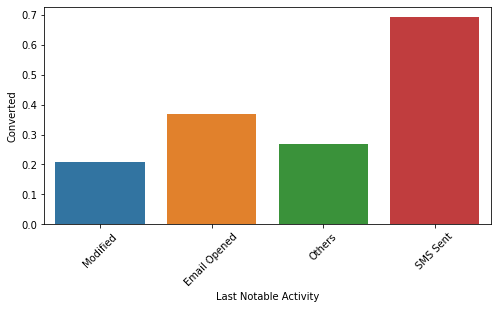

In [40]:
show_bar_plot("Last Notable Activity")

#### TotalVisits

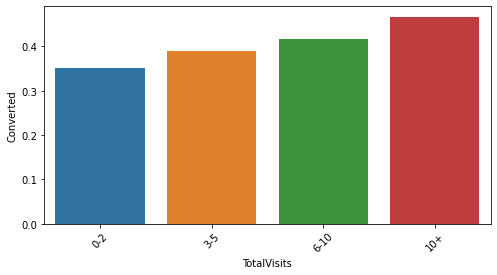

In [41]:
show_bar_plot("TotalVisits")

#### Total Time Spent on Website

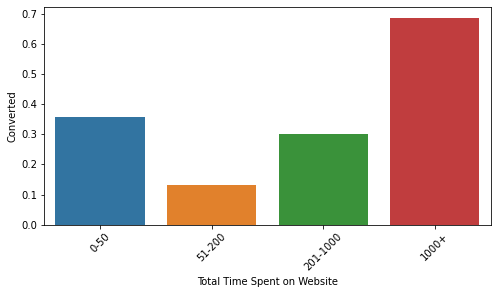

In [42]:
show_bar_plot("Total Time Spent on Website")

#### Page Views Per Visit

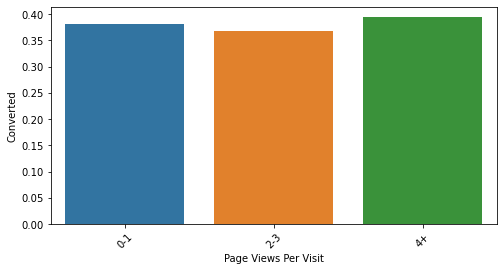

In [43]:
show_bar_plot("Page Views Per Visit")

Inferences :-

1. Those who have 'Lead Add Form' in the 'Lead Origin' have a 80% + chance of being converted 
2. Those who have 'Others' in the 'Lead Source' have almost a 80% chance of being converted 
3. Those who have 'SMS Sent' in the 'Last Activity' have a 60% + chance of being converted 
4. Those who have 'SMS Sent' in the 'Last Notable Activity' have a 70% chance of being converted 
5. As we can see TotalVisits is not helpful in our analysis
6. Those who have 1000+ in the Total Time Spent On Website have a 70% chance of being converted 
7. As we can see Page Views Per Visit is not helpful in our analysis

#### Binary Features

Let us now check the relationship between the binary features and the 'Converted' column

In [44]:
binary_features.remove("Converted")

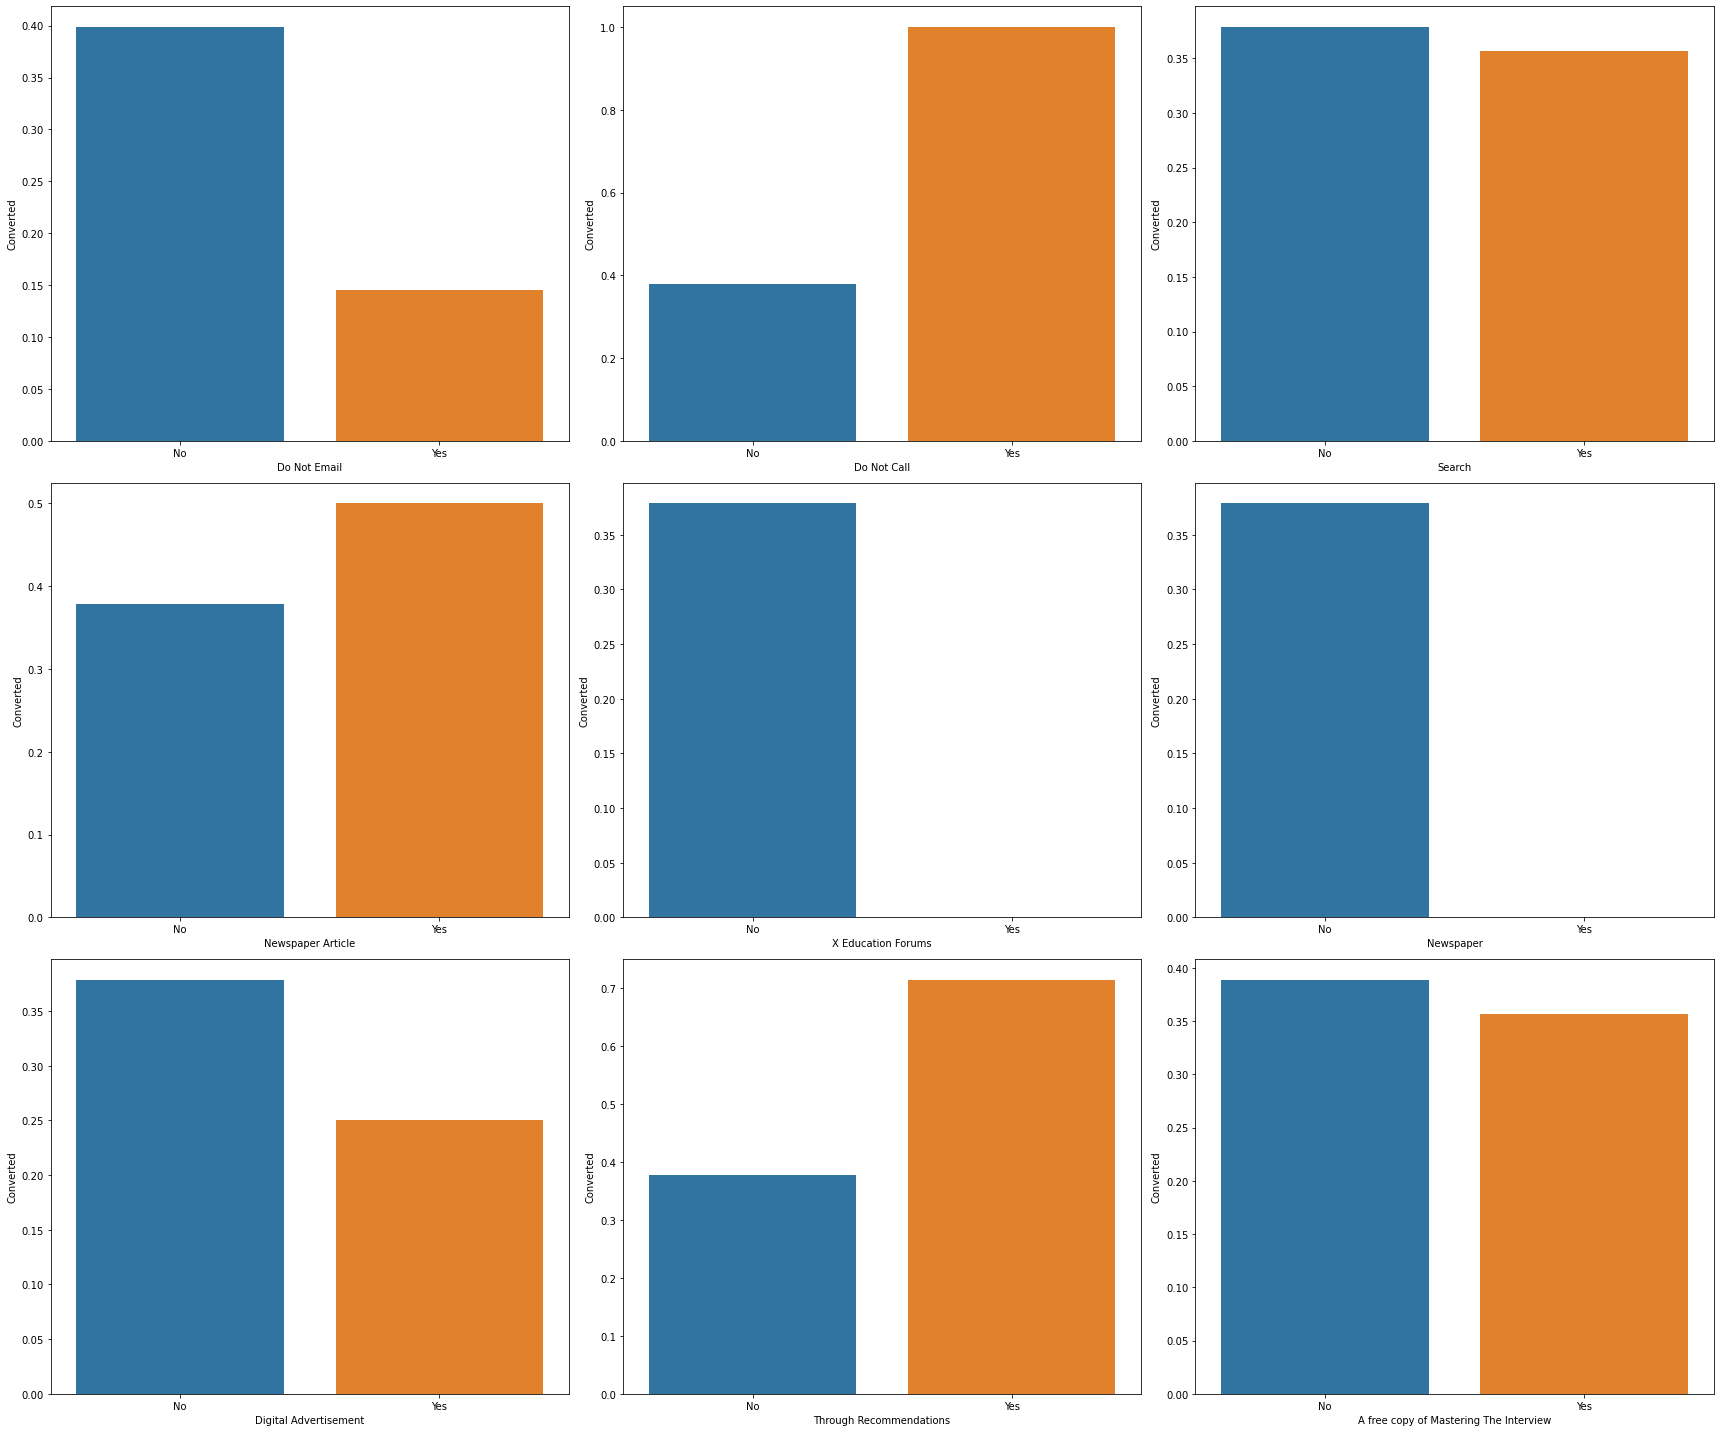

In [45]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(24,20))
for i,d in enumerate(binary_features):
    (x,y) = divmod(i,3)
    sns.barplot(d, y="Converted", data=leads, ci=None, ax=ax[x,y])
plt.tight_layout()
plt.show()

Inferences :-

1. As we can see 'Do Not Email' is not helpful in our analysis
2. Those who have 'Yes' in the 'Do Not Call' have almost 100% chance of being converted
3. As we can see 'Search' is not helpful in our analysis
4. As we can see 'Newspaper Article' is not helpful in our analysis
5. We have negligible values of 'Yes' in 'X Education Forums'. So it is not helpful in our analysis
6. We have negligible values of 'Yes' in 'Newspaper'. So it is not helpful in our analysis
7. As we can see 'Digital Advertisement' is not helpful in our analysis
8. Those who have 'Yes' in the 'Through Recommendations' have almost 70% chance of being converted
9. As we can see 'A free copy of Mastering The Interview' is not helpful in our analysis

## Data Preparation

In [46]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 19 columns):
 #   Column                                  Non-Null Count  Dtype   
---  ------                                  --------------  -----   
 0   Prospect ID                             9074 non-null   object  
 1   Lead Number                             9074 non-null   int64   
 2   Lead Origin                             9074 non-null   object  
 3   Lead Source                             9074 non-null   object  
 4   Do Not Email                            9074 non-null   object  
 5   Do Not Call                             9074 non-null   object  
 6   Converted                               9074 non-null   int64   
 7   TotalVisits                             9074 non-null   category
 8   Total Time Spent on Website             9074 non-null   category
 9   Page Views Per Visit                    9074 non-null   category
 10  Last Activity                           9074 non

In [47]:
# Storing the Lead Numbers as it will be helpful while assgining lead scores
ids = leads["Lead Number"]

### Dropping The Columns Which Are Not Helpful

In [48]:
drop_cols = ["TotalVisits", "Page Views Per Visit", "Do Not Email", "Search", "Newspaper Article", 
             "X Education Forums", "Newspaper", "Digital Advertisement", "A free copy of Mastering The Interview"]

In [49]:
leads.drop(["Prospect ID", "Lead Number"], axis=1, inplace=True)
leads.drop(drop_cols, axis=1, inplace=True)

### One Hot Encoding

In [50]:
cat_cols = ["Lead Origin", "Lead Source", "Last Activity", "Last Notable Activity", "Do Not Call", "Total Time Spent on Website", "Through Recommendations"]

In [51]:
dummies = pd.get_dummies(leads[cat_cols], drop_first=True)

In [52]:
leads.drop(cat_cols, axis=1, inplace=True)
leads = pd.concat([leads, dummies], axis=1)

### Correlation Of All The Features

In [53]:
# Getting The Correlation Matrix
corr_mat = leads.corr()

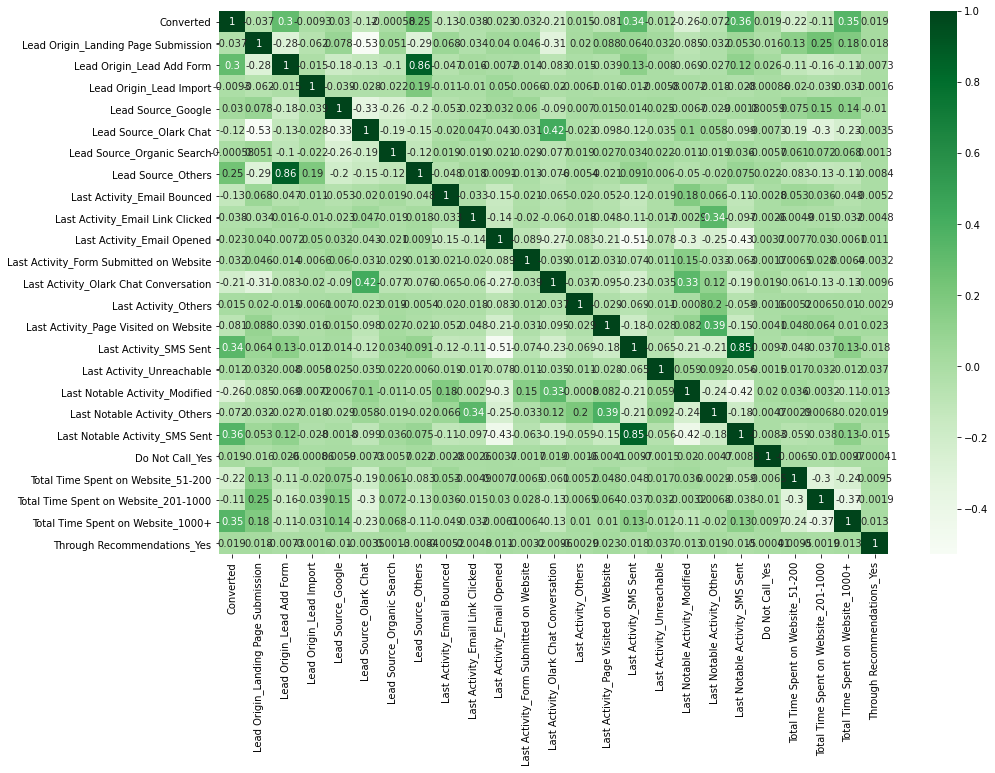

In [54]:
# Displaying The Correlation Matrix As A Heatmap
plt.figure(figsize=(15,10))
sns.heatmap(corr_mat, cmap="Greens", annot=True)
plt.show()

### Separating The Predictor Variables & The Target Variable

In [55]:
y = leads["Converted"].values
X = leads.drop("Converted", axis=1)

cols = X.columns.tolist()

### Creating The Train-Test Split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

### Standardizing The Predictor Variables

In [57]:
ss = StandardScaler()

X_train = pd.DataFrame(ss.fit_transform(X_train), columns=cols)
X_test = pd.DataFrame(ss.fit_transform(X_test), columns=cols)

## Model Building

### Using Recursive Feature Elimination To Trim Down The Number Of Features to 15

In [58]:
rfem = RFE(LogisticRegression(),15).fit(X_train,y_train)
sel_cols = X_train.columns[rfem.support_]

In [59]:
# Selecting the features based on RFE
X_train = X_train[sel_cols]

# Adding a constant to the dataset
X_train=add_constant(X_train)

### Logistic Regression

In [60]:
# Method to fit a Logistic Regression Model

def fit_model(X_train, y_train):
    lrm = GLM(y_train,X_train,family=families.Binomial()).fit()
    print(lrm.summary())
    return lrm

In [61]:
# Method to calculate the Variance Inflation Factor

def calculate_vif(X_train):
    vif = pd.DataFrame()
    vif["variables"] = X_train.columns
    vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif.sort_values(by="VIF", ascending=False, inplace=True)
    return vif

#### 1st Model

In [62]:
lrm = fit_model(X_train,y_train)
calculate_vif(X_train.drop("const", axis=1))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 6805
Model:                            GLM   Df Residuals:                     6789
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3148.7
Date:                Sat, 12 Jun 2021   Deviance:                       6297.3
Time:                        21:35:39   Pearson chi2:                 7.05e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

,variables,VIF
10,Last Notable Activity_SMS Sent,5.201916
8,Last Activity_SMS Sent,4.841337
3,Lead Source_Olark Chat,3.430648
13,Total Time Spent on Website_201-1000,3.423886
14,Total Time Spent on Website_1000+,2.933314
5,Last Activity_Email Opened,2.510995
12,Total Time Spent on Website_51-200,2.503827
1,Lead Origin_Lead Add Form,2.002145
9,Last Notable Activity_Modified,1.973178
0,Lead Origin_Landing Page Submission,1.798310


We can see that 'Last Notable Activity_SMS Sent' has a VIF > 5. So we will drop it.

#### 2nd Model

In [63]:
X_train.drop("Last Notable Activity_SMS Sent", axis=1, inplace=True)
lrm = fit_model(X_train,y_train)
calculate_vif(X_train.drop("const", axis=1))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 6805
Model:                            GLM   Df Residuals:                     6790
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3166.3
Date:                Sat, 12 Jun 2021   Deviance:                       6332.7
Time:                        21:35:39   Pearson chi2:                 7.07e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

,variables,VIF
3,Lead Source_Olark Chat,3.430475
12,Total Time Spent on Website_201-1000,3.423750
13,Total Time Spent on Website_1000+,2.932760
11,Total Time Spent on Website_51-200,2.503199
5,Last Activity_Email Opened,2.372337
8,Last Activity_SMS Sent,2.273440
1,Lead Origin_Lead Add Form,2.002124
0,Lead Origin_Landing Page Submission,1.798145
6,Last Activity_Olark Chat Conversation,1.779344
9,Last Notable Activity_Modified,1.380898


We can see that 'Do Not Call_Yes' has a p-value >= 0.05. So we will drop it.

#### 3rd Model

In [64]:
X_train.drop("Do Not Call_Yes", axis=1, inplace=True)
lrm = fit_model(X_train,y_train)
calculate_vif(X_train.drop("const", axis=1))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 6805
Model:                            GLM   Df Residuals:                     6791
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3167.4
Date:                Sat, 12 Jun 2021   Deviance:                       6334.9
Time:                        21:35:39   Pearson chi2:                 7.07e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

,variables,VIF
3,Lead Source_Olark Chat,3.430078
11,Total Time Spent on Website_201-1000,3.423743
12,Total Time Spent on Website_1000+,2.932496
10,Total Time Spent on Website_51-200,2.503193
5,Last Activity_Email Opened,2.371851
8,Last Activity_SMS Sent,2.273425
1,Lead Origin_Lead Add Form,2.001225
0,Lead Origin_Landing Page Submission,1.797989
6,Last Activity_Olark Chat Conversation,1.778443
9,Last Notable Activity_Modified,1.380256


Now there is no variable having VIF > 5 or p-value >= 0.05

#### Making Predictions On The Training Data Set

In [65]:
train_pred=lrm.predict(X_train)

# Creating a new dataset and saving predicted values in it
train_pred_final=pd.DataFrame({'ID':X_train.index, 'Converted':y_train,'Converted_probability':train_pred})

### ROC Curve

In [66]:
def display_roc_plot( real, probability ):
    
    fpr, tpr, thresholds = roc_curve( real, probability,drop_intermediate = False )   
    auc_score = roc_auc_score( real, probability )    
    
    plt.figure(figsize=(8, 4))
    
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'r--')
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")

    plt.show()

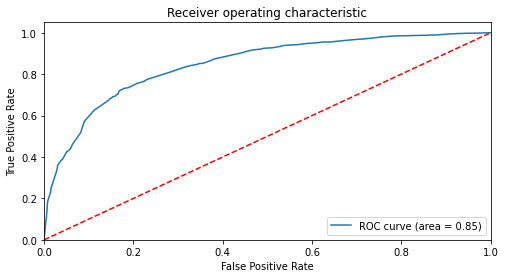

In [67]:
display_roc_plot(train_pred_final.Converted, train_pred_final.Converted_probability)

### Finding Optimal Probability Cutoff Point

In [68]:
numbers=[float(x)/10 for x in range(10)]  # from 0 to 0.9

# Mapping the probablities for each 10 points
for i in numbers:
    train_pred_final[i]=train_pred_final['Converted_probability'].map(lambda x:1 if x > i else 0)   
    
train_pred_final.head()  

,ID,Converted,Converted_probability,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0,0.058403,1,0,0,0,0,0,0,0,0,0
1,1,1,0.874862,1,1,1,1,1,1,1,1,1,0
2,2,0,0.152619,1,1,0,0,0,0,0,0,0,0
3,3,0,0.320788,1,1,1,1,0,0,0,0,0,0
4,4,1,0.899941,1,1,1,1,1,1,1,1,1,0


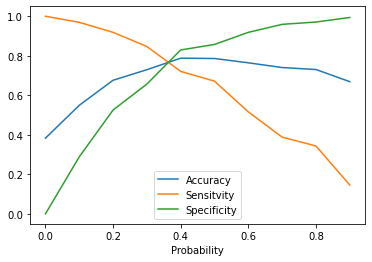

In [69]:
# Caculating accuracy, sensitivity and specificity with probability cutoffs

df_cutoffs=pd.DataFrame(columns=['Probability','Accuracy','Sensitvity','Specificity'])

for i in numbers:
    # Creating confusion matrix 
    cm_matrix=confusion_matrix(train_pred_final['Converted'],train_pred_final[i]) 
    
    tn, fp, fn, tp = cm_matrix.ravel()
     
    # Storing Accuracy Data 
    accuracy= (tn+tp)/(tn+fp+fn+tp)
    
    # Storing Sensitivity Data
    sensitivity = tp / (tp+fn)    
    
    # Storing Specificity Data
    specificity = tn / (tn+fp)
    
    df_cutoffs.loc[i]=[i, accuracy, sensitivity, specificity]                         

# Ploting 'Accuracy' , 'Sensitivity' and 'Specificity' for various probabilities
df_cutoffs.plot.line(x='Probability', y=['Accuracy','Sensitvity','Specificity'])
plt.show()  

From the above curve, 0.4 is the optimum point for taking probability cutoff as the meeting point is almost at 0.4. Also we can see that there is a trade off between sensitivity and specificity.

In [70]:
# Predicting the outcomes with probability cutoff as 0.4

train_pred_final['Predicted']=train_pred_final['Converted_probability'].map(lambda x:1 if x >0.4 else 0 )

### Precision & Recall

In [71]:
# Creating confusion matrix to find precision and recall score
confusion_pr=confusion_matrix(train_pred_final.Converted,train_pred_final.Predicted)

print('Precision',confusion_pr[1,1]/(confusion_pr[0,1]+confusion_pr[1,1]))
print('Recall',confusion_pr[1,1]/(confusion_pr[1,0]+confusion_pr[1,1]))

Precision 0.724191063174114
Recall 0.7211354046797085


As per our business objective, the recall percentage I will consider more valuable because it is okay if our precision is little low which means less hot lead customers but we don't want to leave out any hot leads which are willing to get converted hence our focus will be more on Recall than Precision.

### Making Predictions On The Test Dataset

In [72]:
X_test = add_constant(X_test)
X_test = X_test[X_train.columns.tolist()]

In [73]:
pred = lrm.predict(X_test).map(lambda x:1 if x > 0.3 else 0)   

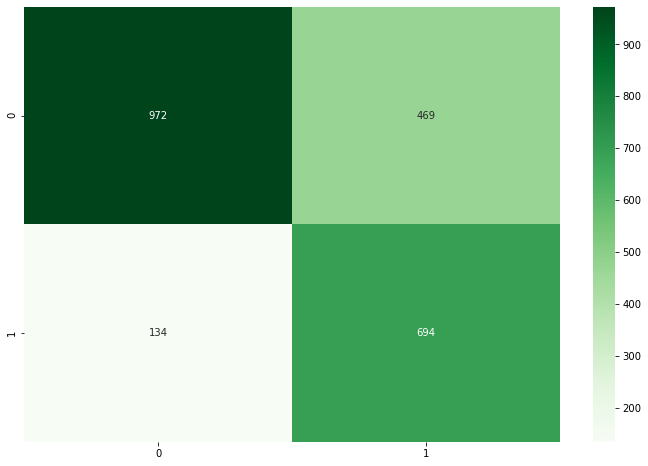

Sensitivity: 0.84
Specificity: 0.67


In [74]:
# Creating Confusion Matrix
cm_matrix=confusion_matrix(y_test,pred) 

# Displaying The Confusion Matrix
plt.figure(figsize=(12,8))
sns.heatmap(cm_matrix, cmap="Greens", annot=True, fmt="0.0f")
plt.show()

# Sensitivity & Specificity
tn, fp, fn, tp = cm_matrix.ravel()
sensitivity = tp / (tp+fn)
specificity = tn / (tn+fp)

print("Sensitivity: {}".format(round(sensitivity,2)))
print("Specificity: {}".format(round(specificity,2)))

We got a sensitivity of 0.84 and specificity of 0.67 on the Test Dataset.

## Assigning A Score To Each Lead In The Test Dataset

In [75]:
leads.drop("Converted", axis=1, inplace=True)
leads = pd.DataFrame(ss.transform(leads),columns=cols)

In [76]:
cols = X_train.drop("const", axis=1).columns.tolist()
leads = leads[cols]
leads = add_constant(leads)

In [77]:
scores = pd.DataFrame({"Lead Number": ids, "Score": lrm.predict(leads)*100})
scores.set_index("Lead Number", inplace=True)